<a href="https://colab.research.google.com/github/jogabenn/Advanced-Machine-Learning-Methods-Activities/blob/main/Activity2b/TC4033_Activity2b_ID4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

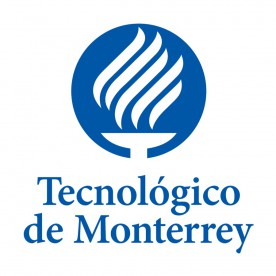

# **Masters in Applied Artificial Intelligence**
## **Course: Advanced Machine Learning Methods**
### Tecnológico de Monterrey
### José Antonio Cantoral Ceballos, Ph.D.

# TC 5033
## Deep Learning
## Convolutional Neural Networks

## **Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch**

***Group 4:***

**Victor Alejandro Regueira Romero | A01794404 ​**

**Fernando Maytorena Espinosa de los Monteros | A01110946​**

**Alejandra Ramírez Romano | A01793144**

**Jonathan Garza Bennet | A01793038​**

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

In [ ]:
#Importing required modules for the excercise
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt

#only if you have jupyterthemes
#from jupyterthemes import jtplot
#jtplot.style()

### Download Cifar10 dataset

In [ ]:
torch.cuda.is_available()

True

In [ ]:
#Path where the data is going to be stored
DATA_PATH = '/content/CIFAR10'

#Training, validation and test partition sizes
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000

#Minibach size
MINIBATCH_SIZE = 64

#Compose, transform to Pytorch Tensor and normalize function
transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

#Download, transform, and load training dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
#Download, transform, and load validation dataset
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
#Download, transform, and load testing dataset
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
#Visualize Training Dataset
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/CIFAR10
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [ ]:
#Visualize Training Batch Size
train_loader.batch_size

64

In [ ]:
#for i, (x, y) in enumerate(train_loader):

### Using  GPUs

In [ ]:
#Use GPU if available
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cuda


### Display Images to Visualize the Dataset

The image displayed is: frog


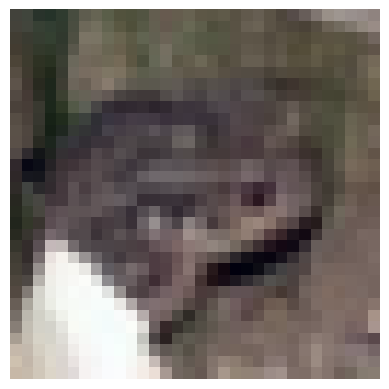

In [ ]:
#Load datset classes
classes = test_loader.dataset.classes

#Function to display imaged
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

#Establish a random index to display
rnd_sample_idx = np.random.randint(len(test_loader))

print(f'The image displayed is: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]

#Return image to original units
image = (image - image.min()) / (image.max() -image.min() )

#Display image
plot_figure(image)


In [ ]:
classes = test_loader.dataset.classes
for label, sample in enumerate(classes):
  print(label,sample)

0 airplane
1 automobile
2 bird
3 cat
4 deer
5 dog
6 frog
7 horse
8 ship
9 truck


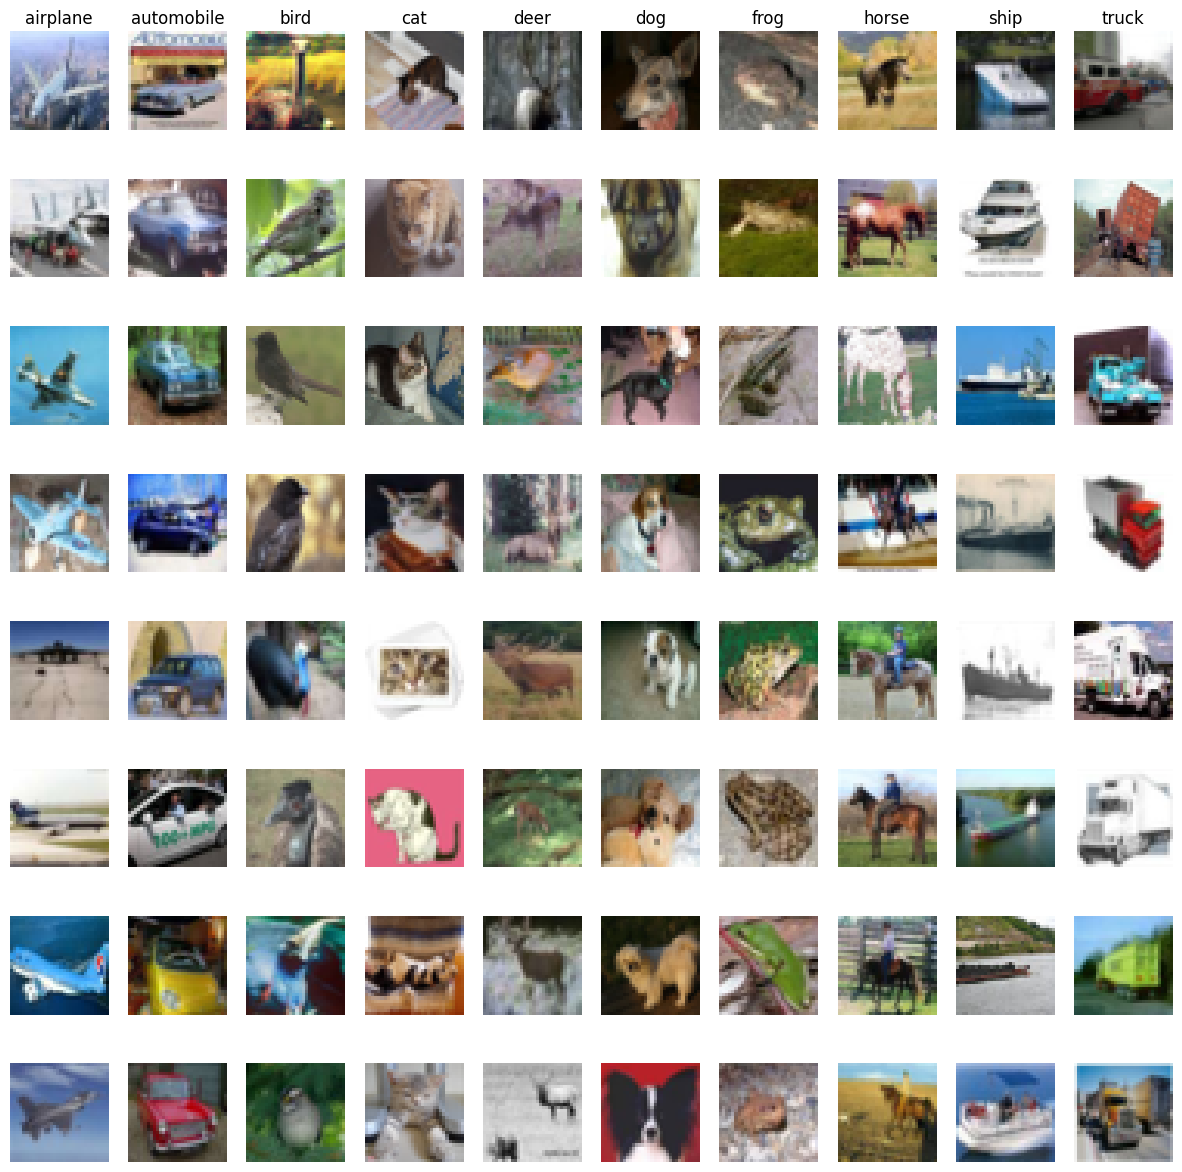

In [ ]:
#Function to display a grid of images from the datset
def plot_cifar10_grid():

    #Get dataset classes
    classes = test_loader.dataset.classes

    #Total samples to display
    total_samples = 8

    #Define plot size
    plt.figure(figsize=(15,15))

    #Loop for displaying samples from each label
    for label, sample in enumerate(classes):

        #Get indexes from current label
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))

        #Select a randomly samples from current class
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)

        #Display data selected
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')

            if i == 0: plt.title(sample)

    #Show plot after finishing the loop
    plt.show()

#Run the function
plot_cifar10_grid()

### Accuracy Function


In [ ]:
#Function for calculating accuracy
def accuracy(model, loader):

    #Initialize model metrics to 0
    num_correct = 0
    num_total = 0

    #Put model in evaluation mode (no gradients, no dropout)
    model.eval()

    #Assign model to current processing device
    model = model.to(device=device)

    #We do not need gradients while doing predictions
    with torch.no_grad():

        #Loop for evaluating the model for each minibatch
        for xi, yi in loader:

            #Assign current batch of data to the assigned processing unit with correct data type
            xi = xi.to(device=device, dtype = torch.float32)
            yi = yi.to(device=device, dtype = torch.long)

            #Calculate scores and cost of current minibatch
            scores = model(xi)
            _, pred = scores.max(dim=1)

            #Accumulate the total correct and total elements evaluated
            num_correct += (pred == yi).sum()
            num_total += pred.size(0)
        acc = float(num_correct)/num_total
        #Return accuracy
        return acc

### Training Loop

In [ ]:
#Training function with default 100 epochs
def train(model, optimiser, epochs=100):

    #Assign model to current processing device
    model = model.to(device=device)

    #Epoch loop
    for epoch in range(epochs):

        #Loop for training the model on each of the minibatches created
        for i, (xi, yi) in enumerate(train_loader):

            #Put model on training mode (enable gradients and dropouts)
            model.train()

            #Assign current batch of data to the assigned processing unit with correct data type
            xi = xi.to(device=device, dtype=torch.float32)
            yi = yi.to(device=device, dtype=torch.long)

            #Calculate prediction scores
            scores = model(xi)

            #Calculate the cost
            cost = F.cross_entropy(input= scores, target=yi)

            #Reset gradients
            optimiser.zero_grad()

            #Calculate gradients
            cost.backward()

            #Update training parameters
            optimiser.step()

        #Calculate accuracy on the validation partition
        acc_train = accuracy(model, val_loader)
        acc_val = accuracy(model, train_loader)

        #Return results
        print(f'Epoch: {epoch}, cost: {cost.item()}, accuracy_train: {acc_train}, accuracy_val: {acc_val}')

### Linear model

In [ ]:
#Initial Fully Connected Neural Network Linear Model

#Hyperparameters
hidden1 = 256
hidden = 256
lr = 0.001
epochs = 10

#Calculate data dimensions
width = cifar10_train.data.shape[1]
height = cifar10_train.data.shape[2]
channels = cifar10_train.data.shape[3]

#Make output features equal to the number of classes
out_features = len(cifar10_train.classes)

#Pytorch Fully Connected Neural Network
nn_model = nn.Sequential(nn.Flatten(),
                       nn.Linear(in_features=width*height*channels, out_features=hidden1), nn.ReLU(), nn.Dropout(),
                       nn.Linear(in_features=hidden1, out_features=hidden), nn.ReLU(),
                       nn.Linear(in_features=hidden, out_features=out_features))

#Adam optimizer with previously stablished learning rate
optimiser = torch.optim.Adam(nn_model.parameters(), lr=lr)

In [ ]:
#Train the Fully Connected Neural Network Model
train(nn_model, optimiser, epochs)

Epoch: 0, cost: 1.3683980703353882, accuracy_train: 0.4966, accuracy_val: 0.52258
Epoch: 1, cost: 1.6703330278396606, accuracy_train: 0.4966, accuracy_val: 0.52258
Epoch: 2, cost: 1.2276545763015747, accuracy_train: 0.4966, accuracy_val: 0.52258
Epoch: 3, cost: 1.400093913078308, accuracy_train: 0.4966, accuracy_val: 0.52258
Epoch: 4, cost: 1.0255720615386963, accuracy_train: 0.4966, accuracy_val: 0.52258
Epoch: 5, cost: 1.3369505405426025, accuracy_train: 0.4966, accuracy_val: 0.52258
Epoch: 6, cost: 1.0826289653778076, accuracy_train: 0.4966, accuracy_val: 0.52258
Epoch: 7, cost: 1.1263790130615234, accuracy_train: 0.4966, accuracy_val: 0.52258
Epoch: 8, cost: 1.3106542825698853, accuracy_train: 0.4966, accuracy_val: 0.52258
Epoch: 9, cost: 1.370047926902771, accuracy_train: 0.4966, accuracy_val: 0.52258


In [ ]:
#Calculate Test Partition Accuracy
accuracy(nn_model, test_loader)

0.4722

***The resulting accuracy on all partitions shows that the fully connected neural network model is not capable of reaching a good genealization of the input data. The highest accuracy achieved is around 49% for all partitions with two models tested; one using 2 layers of 256 fully connected neurons and the second with 512. Both models performed very similarly not mattering the increase on complexity.***

In [ ]:
#Initial Convolutional Neural Network Model

#Hyperparameters
channel1 = 32
channel2 = 64
epochs = 10
lr = 0.0001
padding = 1
kernel_size=(3,3)

#Calculate data dimensions
in_channels = channels

#Maxpool dimension calculation
maxpool_kernel = 2
maxpool_stride = 2
maxpool_padding = 0
maxpool_dilation = 1
maxpool_dim = int(((height+(2*maxpool_padding)-(maxpool_dilation*(maxpool_kernel-1))-1)/maxpool_stride)+1)

#Pytorch Convolutional Neural Network
modelCNN1 = nn.Sequential(nn.Conv2d(in_channels=channels, out_channels=channel1,
                                   kernel_size=kernel_size, padding=padding),
                          nn.ReLU(), nn.Dropout(),
                          nn.Conv2d(in_channels=channel1, out_channels=channel2,
                                    kernel_size= kernel_size, padding=padding),
                          nn.ReLU(), nn.Dropout(),
                          nn.MaxPool2d(maxpool_kernel, maxpool_stride),
                          nn.Flatten(),
                          nn.Linear(in_features=maxpool_dim*maxpool_dim*channel2, out_features=out_features)
                                   )

#Adam optimizer with previously stablished learning rate
optimiser = torch.optim.Adam(modelCNN1.parameters(), lr)

In [ ]:
#Train the Convolutional Neural Network Model
train(modelCNN1, optimiser, epochs)

Epoch: 0, cost: 1.3864701986312866, accuracy_train: 0.485, accuracy_val: 0.48536
Epoch: 1, cost: 1.5483454465866089, accuracy_train: 0.5528, accuracy_val: 0.56424
Epoch: 2, cost: 1.2011312246322632, accuracy_train: 0.5724, accuracy_val: 0.58802
Epoch: 3, cost: 1.497118592262268, accuracy_train: 0.5908, accuracy_val: 0.6201
Epoch: 4, cost: 1.4121863842010498, accuracy_train: 0.6248, accuracy_val: 0.6547
Epoch: 5, cost: 1.3021371364593506, accuracy_train: 0.6282, accuracy_val: 0.6613
Epoch: 6, cost: 0.6878123879432678, accuracy_train: 0.6464, accuracy_val: 0.6863
Epoch: 7, cost: 1.077742576599121, accuracy_train: 0.651, accuracy_val: 0.69526
Epoch: 8, cost: 0.8625415563583374, accuracy_train: 0.66, accuracy_val: 0.70824
Epoch: 9, cost: 0.8450321555137634, accuracy_train: 0.6548, accuracy_val: 0.71284


In [ ]:
#Calculate Test Partition Accuracy
accuracy(modelCNN1, test_loader)

0.6526

***The resulting accuracy for the revised convolutional neural network was higher than 66% on all partitions. The last demonstrates that convolutional neural networks achieve a better overall generalization for RGB image classification.***

### Sequential CNN

In [ ]:
#Convolutional Network Layer parameter definition
conv_k_3 = lambda channel1, channel2: nn.Conv2d(in_channels=channel1, out_channels=channel2, kernel_size=(3,3), padding=1)

In [ ]:
#Convolutional Network Class with two layers, Kaiming Hee parameter initialization, batch normalization between layers
#and Max pooling with RELU activation function.
class CNN_class(nn.Module):
    def __init__(self, in_channel, channel1, channel2):
        super().__init__()
        self.conv1 = conv_k_3(in_channel, channel1)
        self.bn1 = nn.BatchNorm2d(channel1)
        nn.init.kaiming_uniform_(self.conv1.weight)

        self.conv2 = conv_k_3(channel1, channel2)
        self.bn2 = nn.BatchNorm2d(channel2)

        self.maxpool = nn.MaxPool2d(kernel_size=(2,2), stride=2)

    def forward(self, x):
        x = F.relu(self.bn2(self.conv2(F.relu(self.bn1(self.conv1(x))))))
        return self.maxpool(x)

In [ ]:
#Implementing Model 2 using CNN_Class

#Hyperparameters
channel1 = 32
channel2 = 64
channel3 = 128
channel4 = 256
epochs = 10
lr = 0.0001

#model
modelCNN2 = nn.Sequential(CNN_class(in_channel=3, channel1=channel1, channel2=channel2),
                          CNN_class(in_channel=channel2, channel1=channel3, channel2=channel4),
                          nn.Flatten(),nn.Linear(in_features=8*8*channel4, out_features=10))

#Optimizer
optimiser = torch.optim.Adam(modelCNN2.parameters(), lr=lr)

In [ ]:
%%time
#Train the Convolutional Neural Network Model
train(modelCNN2, optimiser, epochs)

Epoch: 0, cost: 1.1160699129104614, accuracy_train: 0.646, accuracy_val: 0.68542
Epoch: 1, cost: 0.5503519177436829, accuracy_train: 0.6444, accuracy_val: 0.69644
Epoch: 2, cost: 0.6896879076957703, accuracy_train: 0.7026, accuracy_val: 0.79834
Epoch: 3, cost: 0.6482108235359192, accuracy_train: 0.7138, accuracy_val: 0.81604
Epoch: 4, cost: 0.5684927701950073, accuracy_train: 0.734, accuracy_val: 0.87212
Epoch: 5, cost: 0.5164979696273804, accuracy_train: 0.7352, accuracy_val: 0.89008
Epoch: 6, cost: 0.4205712676048279, accuracy_train: 0.7354, accuracy_val: 0.91988
Epoch: 7, cost: 0.3077954947948456, accuracy_train: 0.7306, accuracy_val: 0.92726
Epoch: 8, cost: 0.523557722568512, accuracy_train: 0.7362, accuracy_val: 0.9454
Epoch: 9, cost: 0.1936638206243515, accuracy_train: 0.734, accuracy_val: 0.9657
CPU times: user 5min 10s, sys: 1.29 s, total: 5min 11s
Wall time: 5min 24s


In [ ]:
#Calculate Test Partition Accuracy
accuracy(modelCNN2, test_loader)

0.728

***The resulting accuracy is 72%. The overall accuracy is still lower than optimal, but gaining more than 23% is a remarkable achievement comparing a model versus the other. Convolutional neural networks are a very good option for trying to resolve complex problems involving datasets with high dimensionality, since they allow to isolate the relevant information from the data through automatically learning the required filtering weights, before using a regular fully connected neural network to finish the classification exercise. The first CNN model created used two convolutional layers with 34 and 64 filter respectively with 2D max pooling of 2 for kernel and stride. The resulting accuracy was significantly improved comparing to the fully connected model. A second model was tested with increased complexity to determine if it was going to be capable of adapting better to the input data. Two additional CNN layers were added, but applying batch normalization in between layers to avoid some elements from the outputs to gain more importance than others. Hyperparameters started the same with the same number of filters (32 and 64) for the first two layers, while the third and fourth continued increasing using powers of 2 (128 and 256) as part of the selected increase on complexity and to keep the model optimizers working the best possible. The rest of the hyperparameters (like learning rate) were kept equivalent between models. The resulted accuracy for the second model increased from 66 to over 72% for all training, validation and test partitions***